# Machine Learning now

In [100]:
import pandas as pd
import os
import numpy as np
import sklearn 
import scipy.linalg as scplinag
from sklearn.neighbors import KDTree
from scipy.spatial import distance

In [110]:
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA"
FILE_NAME = r"/5_Data_ML_attributes_subset_10_NN.txt"
IMAGE_FILE_PATH = r"images"
df = pd.read_csv(FILE_PATH+FILE_NAME, delimiter=',')
df.rename(index=str, columns={"range": "relative_height"}, inplace = True)
df.head()

,X,Y,Z,class,lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,lambda8,local_density,radius_neighbourhood,relative_height,verticality
0,1905.494751,21122.037109,38.884586,2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,4261.669562,0.085096,-2.497189,0.000847
1,1905.502930,21122.035156,38.883110,2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,5823.906523,0.076683,-2.498982,0.000847
2,1905.512939,21122.033203,38.883949,2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,8935.102422,0.066487,-2.498448,0.000847
3,1905.520874,21122.031250,38.882137,2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,13230.696902,0.058332,-2.500576,0.000847
4,1905.531128,21122.029297,38.882839,2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,23917.406724,0.047885,-2.500191,0.000902


In [111]:
df.describe()

,X,Y,Z,class,lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,lambda8,local_density,radius_neighbourhood,relative_height,verticality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1907.187812,21121.768879,41.085796,2.423000,0.980661,0.018736,6.031984e-04,2.558039e-05,0.999397,0.016425,0.004141,5.973665e-04,81606.463560,0.076064,-0.273462,0.176337
std,2.940683,0.795835,5.413538,1.044587,0.048768,0.048899,4.577204e-04,6.547427e-05,0.000458,0.036770,0.012597,4.527045e-04,66137.152327,0.118208,5.536479,0.452433
min,1900.446655,21120.710938,38.881927,2.000000,0.692346,0.000047,3.912000e-07,3.486093e-07,0.998001,0.001678,0.000196,3.911110e-07,1.335546,0.024004,-2.501492,0.000005
25%,1906.381409,21121.298340,38.946611,2.000000,0.988544,0.001963,1.329874e-04,4.629228e-06,0.999010,0.001974,0.000235,1.329287e-04,14948.541978,0.026172,-2.475626,0.000084
50%,1907.725159,21121.571289,38.957901,2.000000,0.993516,0.005662,6.452654e-04,5.498964e-06,0.999355,0.003010,0.000380,6.419667e-04,71983.988653,0.033166,-2.468052,0.000270
75%,1909.059143,21121.851562,38.968621,2.000000,0.997542,0.010420,9.903819e-04,6.994137e-06,0.999867,0.006988,0.001012,9.786264e-04,146484.258256,0.056006,-2.419041,0.000960
max,1911.933228,21123.822266,60.228806,5.000000,0.999926,0.307616,1.998753e-03,5.342865e-04,1.000000,0.303665,0.164601,1.978733e-03,189872.594261,1.252800,19.194847,1.978607


In [113]:
df.replace([np.inf, -np.inf], np.nan)

,X,Y,Z,class,lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,lambda8,local_density,radius_neighbourhood,relative_height,verticality
0,1905.494751,21122.037109,38.884586,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,4261.669562,0.085096,-2.497189,0.000847
1,1905.502930,21122.035156,38.883110,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,5823.906523,0.076683,-2.498982,0.000847
2,1905.512939,21122.033203,38.883949,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,8935.102422,0.066487,-2.498448,0.000847
3,1905.520874,21122.031250,38.882137,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,13230.696902,0.058332,-2.500576,0.000847
4,1905.531128,21122.029297,38.882839,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,23917.406724,0.047885,-2.500191,0.000902
5,1905.540283,21122.027344,38.881927,2,0.998865,0.001132,3.097799e-06,1.161820e-06,0.999997,0.005496,0.000765,3.094279e-06,25877.928393,0.046644,-2.501435,0.000838
6,1905.550415,21122.025391,38.883514,2,0.999183,0.000813,3.700084e-06,1.111993e-06,0.999996,0.005524,0.000770,3.697050e-06,23045.937221,0.048481,-2.500134,0.000838
7,1905.560425,21122.023438,38.884193,2,0.999335,0.000661,3.839039e-06,1.061174e-06,0.999996,0.005569,0.000777,3.836475e-06,25413.508852,0.046926,-2.499768,0.000838
8,1905.570068,21122.021484,38.884876,2,0.999331,0.000667,1.697636e-06,7.981493e-07,0.999998,0.005498,0.000766,1.696499e-06,25220.668059,0.047045,-2.499386,0.000898
9,1905.578003,21122.019531,38.883396,2,0.999331,0.000667,1.697636e-06,7.981493e-07,0.999998,0.005498,0.000766,1.696499e-06,23917.406724,0.047885,-2.501175,0.000898


In [114]:
# Test whether there are any NAN values in the data set 
if df.isnull().values.any() == False:
    print("No Nan in this data set")
else:
    print("There are Nan in this dataset")
    

No Nan in this data set


In [11]:
df_features = df.iloc[:,4:]
df_features.head()

,lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,lambda8,relative_height,verticality
0,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,-2.497189,0.000847
1,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,-2.498982,0.000847
2,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,-2.498448,0.000847
3,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,-2.500576,0.000847
4,0.998865,0.001132,0.000003,0.000001,0.999997,0.005496,0.000765,0.000003,-2.500191,0.000902


In [19]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

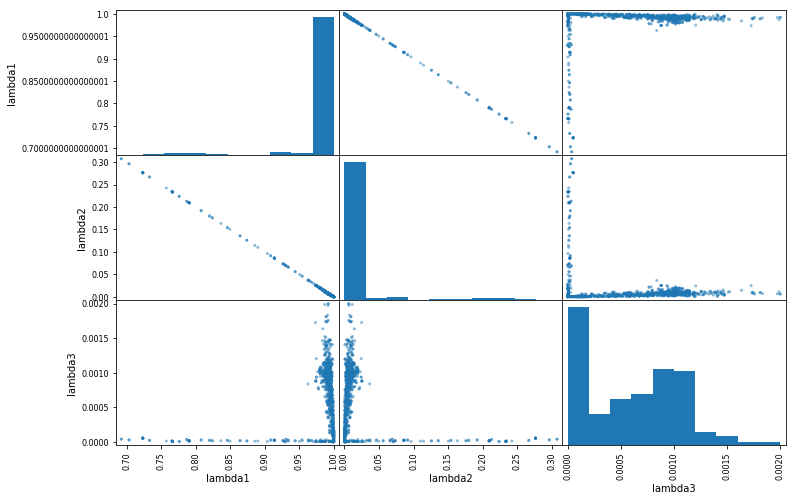

In [21]:
# This is interesting for comparing lambda 1, 2, 3 and we expect them to be correlated really 
scatter_matrix(df_features.iloc[:,0:3], figsize=(12,8)), plt.show();

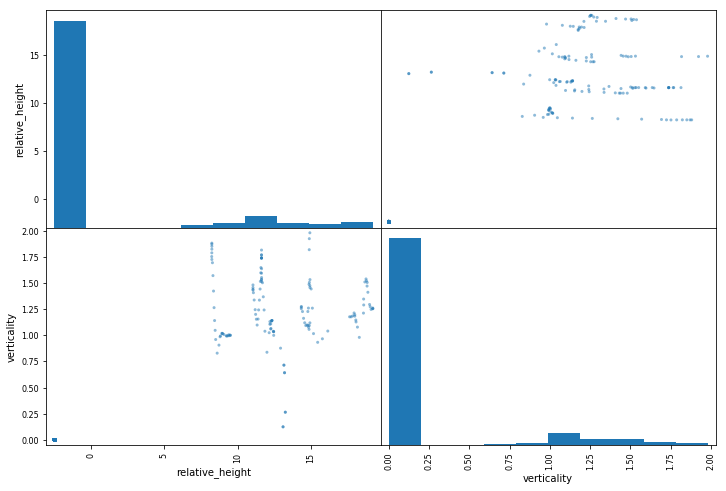

In [22]:
scatter_matrix(df_features.iloc[:,8:], figsize=(12,8)), plt.show();

In [26]:
np.log(0.000000000000000000000000000000000000000000000000000000000000001)

-145.06286085862487

In [32]:
# Eigentropy
D = [0.000000000000000000000000000000000000000000000001, 0.00000000000000000000000000000000000003, 0.000000000000000000000000000000000000000000000000000000001]    
s = 0
for elem in D:
    s = s + (elem*np.log(elem))
lambda6 = (-1)*s  

In [35]:
test = [D, D, D, D, D, D]

AttributeError: 'list' object has no attribute 'shape'

In [34]:
test

[[1e-48, 3e-38, 1e-57],
 [1e-48, 3e-38, 1e-57],
 [1e-48, 3e-38, 1e-57],
 [1e-48, 3e-38, 1e-57],
 [1e-48, 3e-38, 1e-57],
 [1e-48, 3e-38, 1e-57]]

In [36]:
np.log(0)

/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [67]:
D = np.array([0.0000000999, 0.00000000000000000000000000000000000000000000000000000001, 0.000000000000000000000000000000000000000000000000000004])
res = D[0]*np.log(D[0])+D[1]*np.log(D[1])+D[2]*np.log(D[2])
res = res * (-1)
print res


1.610297705514061e-06


In [68]:
s = 0
for elem in D:
    if elem == 0:
        print "Eigenvalue close to zero."
    else:
        # Only if bigger than 0
        s = s + (elem*np.log(elem))
lambda6 = (-1)*s
print lambda6

1.610297705514061e-06


In [69]:
if res == lambda6:
    print 'yess'

yess


In [70]:
D[0]*D[1]*D[2]

3.9960000000000004e-117

In [71]:
test = np.prod(D)
test

3.9960000000000004e-117

In [72]:
pow(9,2)

81

In [73]:
pow(test,(1.0/3))

1.58687174180827e-39

In [74]:
float(1/3)

0.0

In [77]:
x = np.NaN

In [78]:
x

nan

In [79]:
liste = [1,2,5,3,7,3,5,7]
liste[-1]

7

In [84]:
data = df.values
print type(data)
dataxyz = data[:,0:3]
subset = dataxyz[:1000]

<type 'numpy.ndarray'>


In [87]:
subset.shape

(1000, 3)

In [89]:
kdt = KDTree(subset, leaf_size=40, metric='euclidean')

In [90]:
idx_list = kdt.query(subset, k=5, return_distance=False, sort_results = True)

In [91]:
idx_list

array([[  0,   1,   2,   3,   4],
       [  1,   0,   2,   3,   4],
       [  2,   3,   1,   0,   4],
       ...,
       [997, 998, 996, 999, 995],
       [998, 997, 999, 996, 995],
       [999, 998, 997, 996, 995]])

In [94]:
idx_first_point = idx_list[0,0]
idx_last_point = idx_list[0][-1]

print idx_first_point, idx_last_point

0 4


In [97]:
first_point = subset[idx_first_point]
last_point = subset[idx_last_point]
print first_point
print last_point

[ 1905.49475098 21122.03710938    38.88458633]
[ 1905.53112793 21122.02929688    38.8828392 ]


In [101]:
distance.euclidean(first_point, last_point)

0.03724741750494439

In [104]:
np.pi

3.141592653589793

In [108]:
x = (pow(0.085096,3)*np.pi*(4.0/3))

In [109]:
11/x


4261.638793490344

In [1]:
elem = 0.1

In [2]:
if elem == 0:
    print "kaks"

In [3]:
elem == 0

False

In [4]:
D = [1,6,0.1]

for elem in D:
    print elem 

1
6
0.1


In [5]:
D.sort()

In [6]:
D

[0.1, 1, 6]

In [7]:
len(D)

3

In [11]:
matches = (x for x in D if x > 6)
print matches

<generator object <genexpr> at 0x7f77c4f2df50>
